<a href="https://colab.research.google.com/github/brennomongero/alura-git/blob/master/An%C3%A1lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv("dados.csv")


### Visualize o conteúdo do DataFrame

In [3]:
dados.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
classes = [dados.Renda.min(), (788*2), (788*5), (788*15), (788*25), dados.Renda.max()]
labels = ['Até 2 SM', 'De 2 a 5 SM', 'De 5 a 15 SM', 'De 15 a 25 SM', 'Acima de 25 SM']

renda_frequ = pd.value_counts(
    pd.cut (x = dados.Renda,
            bins = classes,
            labels = labels,
            include_lowest = True))

renda_percent = round(pd.value_counts(
          pd.cut( x = dados.Renda,
                  bins = classes,
                  labels = labels,
                  include_lowest = True),
          normalize = True) * 100, 2)

Distri_renda = pd.DataFrame({'Freq': renda_frequ, '%': renda_percent})
Distri_renda.rename_axis (index = 'Classes', axis ='columns', inplace = True)
Distri_renda.sort_index(ascending = True, inplace = True)
Distri_renda

,Freq,%
Classes,,
Até 2 SM,27040,76.60
De 2 a 5 SM,5755,16.30
De 5 a 15 SM,2215,6.28
De 15 a 25 SM,189,0.54
Acima de 25 SM,99,0.28


### 2º Definir os labels das classes

### 3º Construir a coluna de frequências

### 4º Construir a coluna de percentuais

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: xlabel='Classes'>

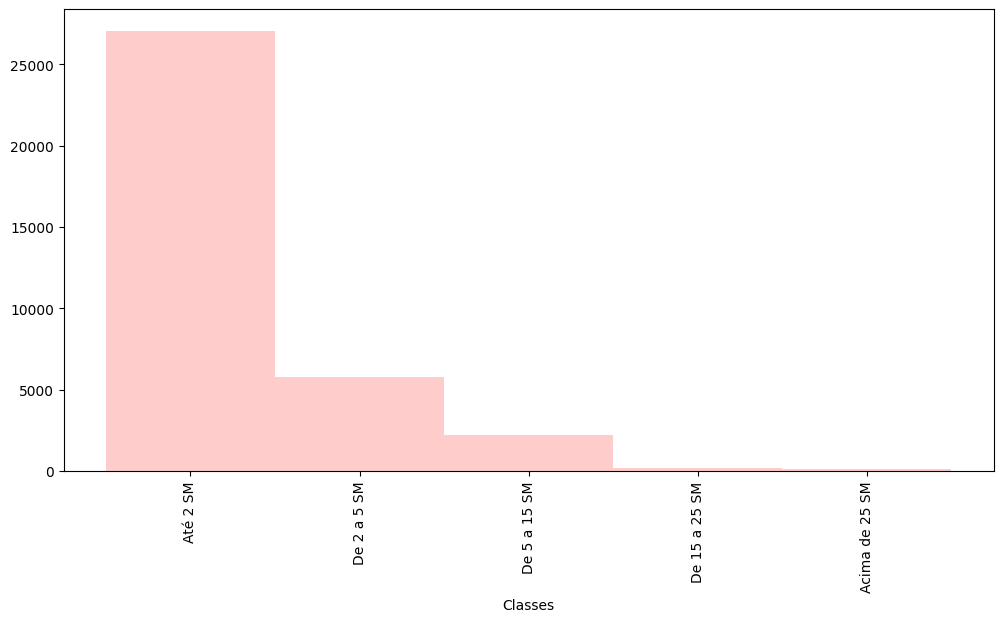

In [41]:
Distri_renda.Freq.plot.bar (width = 1, color = 'red', alpha = 0.2, figsize=(12,6))


> ### Conclusões

Escreva suas conclusões aqui...

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [6]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


<ipython-input-42-8b9b2ce5857b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  hist1 = sns.distplot (dados.Idade, color = 'red')


<Axes: title={'center': 'Histograma Idade'}, xlabel='Idade', ylabel='Density'>

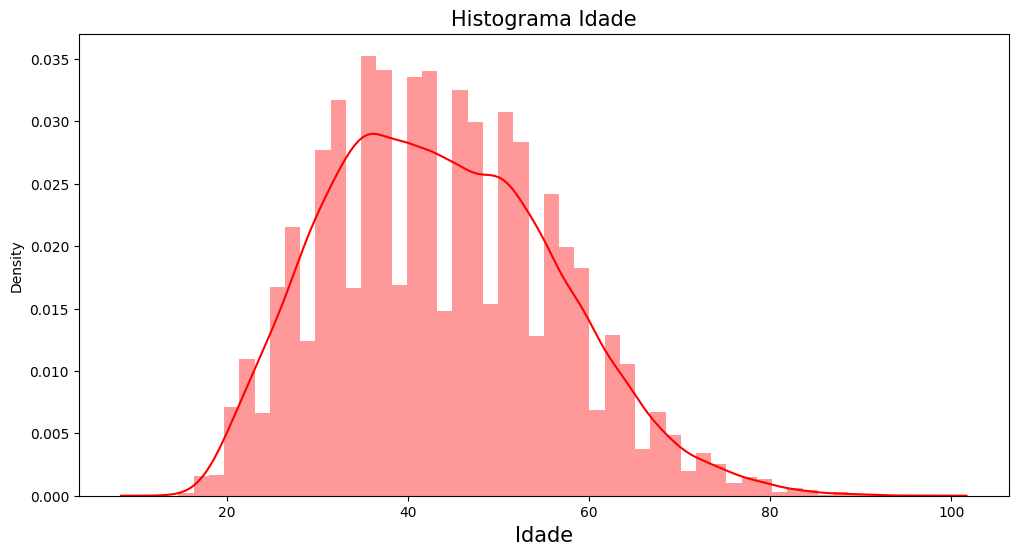

In [42]:
hist1 = sns.distplot (dados.Idade, color = 'red')
hist1.figure.set_size_inches (12, 6)
hist1.set_title ('Histograma Idade', fontsize = 15)
hist1.set_xlabel('Idade', fontsize = 15)
hist1

<ipython-input-8-e6e9d5548844>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  hist2 = sns.distplot (dados.Altura, color = 'red')


<Axes: title={'center': 'Histograma Altura'}, xlabel='Metros', ylabel='Density'>

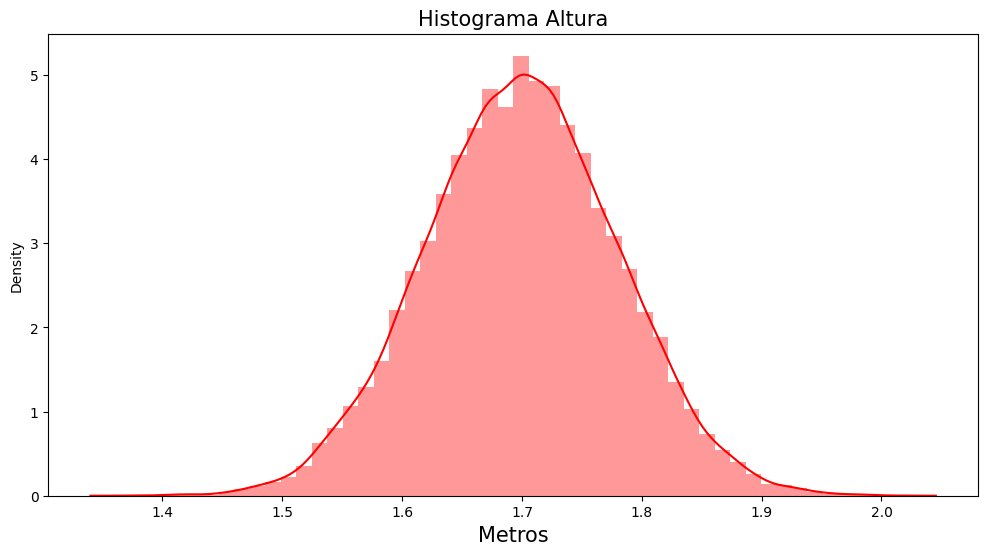

In [8]:
hist2 = sns.distplot (dados.Altura, color = 'red')
hist2.figure.set_size_inches (12, 6)
hist2.set_title ('Histograma Altura', fontsize = 15)
hist2.set_xlabel('Metros', fontsize = 15)
hist2

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<ipython-input-43-dbedff204f23>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda < 20000').Renda, color = 'red', )


<Axes: title={'center': 'Distribuição de Frequências - Renda'}, xlabel='$', ylabel='Density'>

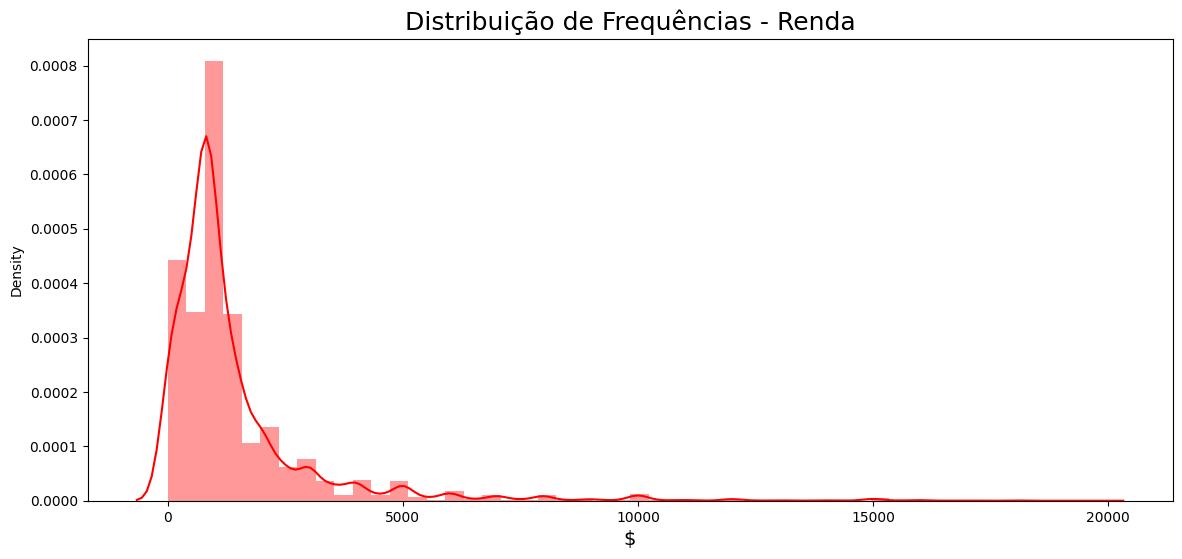

In [43]:
ax = sns.distplot(dados.query('Renda < 20000').Renda, color = 'red', )
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências - Renda', fontsize=18)
ax.set_xlabel('$', fontsize=14)
ax
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [10]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [11]:
Cruzamento = round(pd.crosstab (dados.Sexo,
                          dados.Cor,
                          normalize = True) * 100, 2)
Cruzamento.rename(index = sexo, columns = cor, inplace = True)
Cruzamento

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.53,17.11,8.52,0.12,42.78
Feminino,0.17,7.37,4.44,0.11,18.85


In [12]:
dados ['Sexo'] = dados['Sexo'].replace(sexo)
dados ['Cor'] = dados['Cor'].replace(cor)
dados['UF'] = dados['UF'].replace(uf)
dados.head(20)


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,12,800,1.603808
1,Rondônia,Feminino,23,Branca,12,1150,1.739790
2,Rondônia,Feminino,35,Parda,15,880,1.760444
3,Rondônia,Masculino,46,Branca,6,3500,1.783158
4,Rondônia,Feminino,47,Parda,9,150,1.690631
5,Rondônia,Feminino,34,Parda,12,790,1.637906
6,Rondônia,Masculino,57,Parda,12,3150,1.570078
7,Rondônia,Feminino,60,Parda,12,1700,1.608495
8,Rondônia,Feminino,50,Preta,14,1800,1.780329
9,Rondônia,Masculino,26,Parda,12,1150,1.793203


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [13]:
round(dados.Renda.mean(), 2)

1486.34

### Obtenha a mediana

In [14]:
dados.Renda.median()

860.0

### Obtenha a moda

In [15]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [16]:
dados.Renda.mad()

<ipython-input-16-9b3374082fa9>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dados.Renda.mad()


1150.8806394118903

### Obtenha a variância

In [17]:
dados.Renda.var()

6563287.247030319

### Obtenha o desvio-padrão

In [18]:
dados.Renda.std()

2561.8913417688736

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [48]:
renda_stats = pd.crosstab(dados.Cor,
                dados.Sexo,
                values = dados.Renda,
                aggfunc = {'mean', 'median', 'max'}
                )
renda_stats.rename(index = cor, columns = sexo, inplace = True)
renda_stats


max                   mean                median          
Sexo     Feminino Masculino     Feminino    Masculino Feminino Masculino
Cor                                                                     
Amarela      8000     50000  1327.052632  4303.951220    925.0    1400.0
Branca      30000    200000  1764.718294  2246.350058    850.0    1200.0
Indígena     5500     10000   825.098361   891.529412    788.0     788.0
Parda       30000    100000  1055.995943  1410.447719    788.0     900.0
Preta       18000     50000   966.537676  1337.413231    788.0     980.0

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [49]:
renda_stats = pd.crosstab(dados.Cor,
                dados.Sexo,
                values = dados.Renda,
                aggfunc = {'mad', 'var', 'std'})
renda_stats.rename(index = cor, columns = sexo, inplace = True)
renda_stats


<ipython-input-49-58f9e4faeaf7>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_stats = pd.crosstab(dados.Cor,
<ipython-input-49-58f9e4faeaf7>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_stats = pd.crosstab(dados.Cor,
<ipython-input-49-58f9e4faeaf7>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_stats = pd.crosstab(dados.Cor,
<ipython-input-49-58f9e4faeaf7>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_stats = pd.crosstab(dados.Cor,
<ipython-input-49-58f9e4faeaf7>:1: FutureWarning: The 'mad' method i

mad                       std                        var  \
Sexo         Feminino    Masculino     Feminino    Masculino      Feminino   
Cor                                                                          
Amarela    958.343490  4516.416419  1588.740296  8354.521584  2.524096e+06   
Branca    1532.638044  1888.702190  2742.388712  4284.820241  7.520696e+06   
Indígena   586.285945   704.777603  1001.885235  1181.516796  1.003774e+06   
Parda      767.218272  1015.390408  1513.736790  2084.366594  2.291399e+06   
Preta      610.725378   850.172021  1136.135645  1754.210876  1.290804e+06   

                        
Sexo         Masculino  
Cor                     
Amarela   6.979803e+07  
Branca    1.835968e+07  
Indígena  1.395982e+06  
Parda     4.344584e+06  
Preta     3.077256e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='R$', ylabel='Renda'>

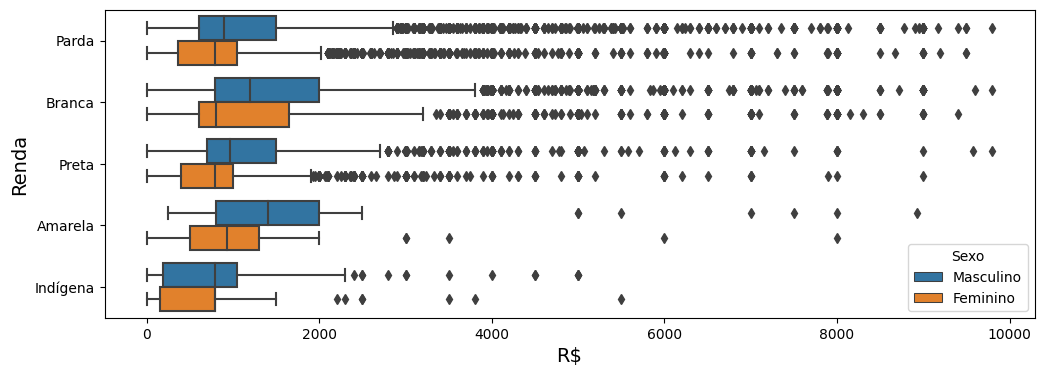

In [50]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches (12, 4)
ax.set_ylabel('Renda', fontsize = 14)
ax.set_xlabel('R$', fontsize = 14)
ax

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [54]:
from scipy import stats
percentual = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
print("{0:.2f}%".format(percentual))

43.86%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [57]:
valor = dados.Renda.quantile(.99)
print("R$ {0:.2f}".format(valor))

R$ 10000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [34]:
renda_media1 = pd.crosstab(dados.Sexo,
                dados['Anos de Estudo'],
                aggfunc = 'mean',
                values = dados.Renda)
renda_mediana1 = pd.crosstab(dados.Sexo,
                dados['Anos de Estudo'],
                aggfunc = 'median',
                values = dados.Renda)
renda_max1 = pd.crosstab(dados.Sexo,
                dados['Anos de Estudo'],
                aggfunc = 'max',
                values = dados.Renda)
print(renda_media1, renda_mediana1, renda_max1)

Anos de Estudo          1           2           3           4            5   \
Sexo                                                                          
Feminino        379.888249  395.868932  401.943396  438.583106   552.040558   
Masculino       639.634131  758.170667  750.346979  870.689600  1011.316995   

Anos de Estudo           6            7            8            9   \
Sexo                                                                 
Feminino         613.722892   752.227129   671.360563   773.133197   
Masculino       1012.560484  1153.702101  1204.118510  1346.827097   

Anos de Estudo           10           11           12          13  \
Sexo                                                                
Feminino         687.278746   765.260417  1068.497080  1401.94403   
Masculino       1219.366242  1444.807584  1807.933865  2097.30445   

Anos de Estudo           14           15           16           17  
Sexo                                                    

In [31]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,12,800,1.603808
1,Rondônia,Feminino,23,Branca,12,1150,1.739790
2,Rondônia,Feminino,35,Parda,15,880,1.760444
3,Rondônia,Masculino,46,Branca,6,3500,1.783158
4,Rondônia,Feminino,47,Parda,9,150,1.690631


### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='R$', ylabel='Renda'>

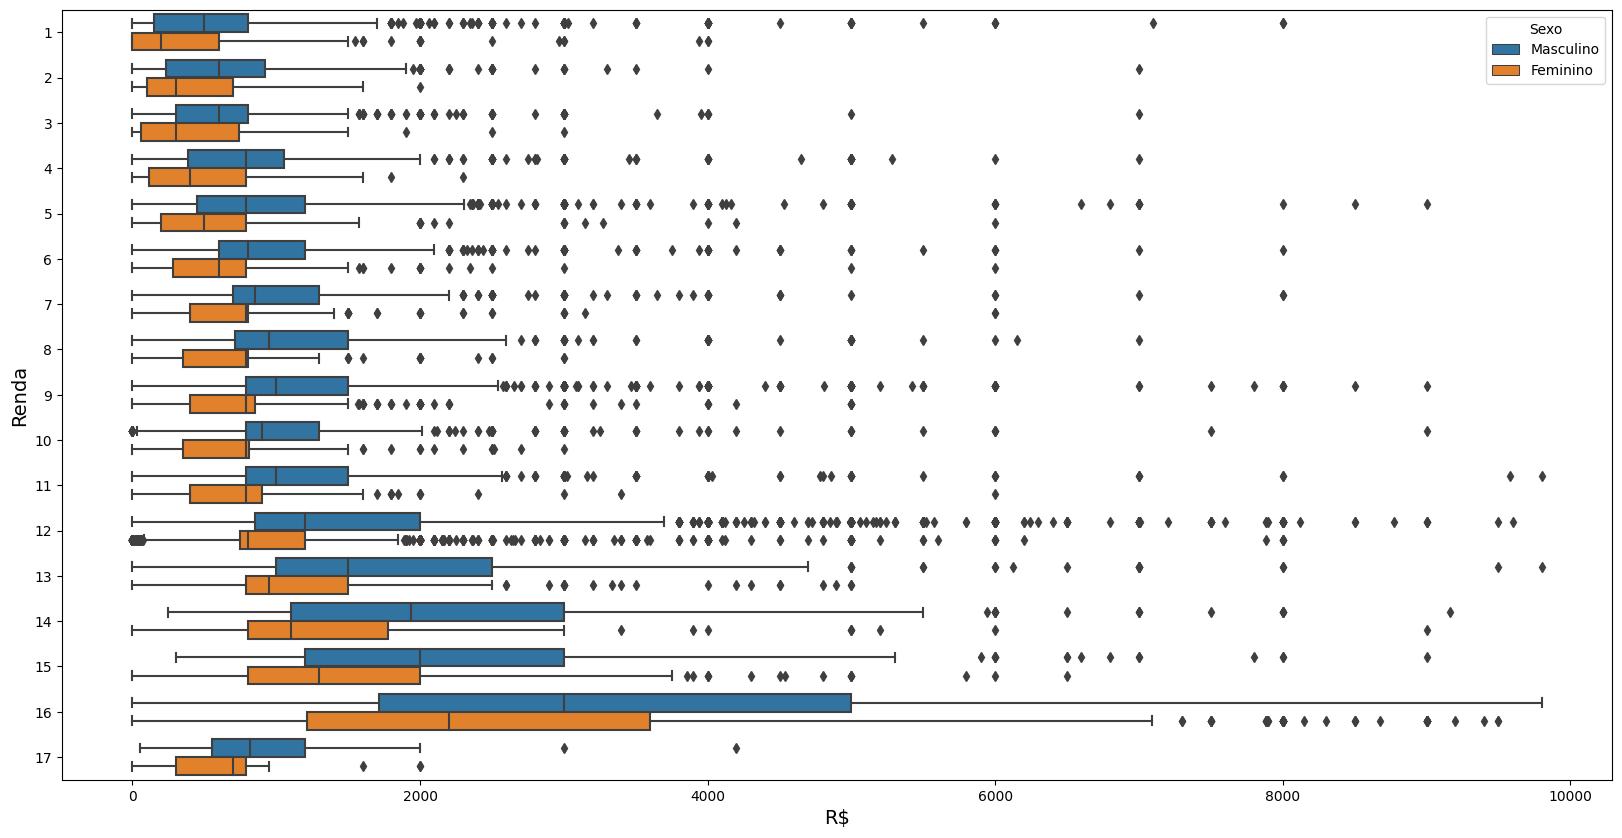

In [67]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches (20, 10)
ax.set_ylabel('Renda', fontsize = 14)
ax.set_xlabel('R$', fontsize = 14)
ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [40]:
dados.groupby('UF').agg({'Renda':['mean', 'median', 'max', 'std']})

Renda                             
                            mean  median     max          std
UF                                                           
Acre                 1506.091782   900.0   30000  2276.233415
Alagoas              1144.552602   788.0   11000  1237.856197
Amapá                1861.353516  1200.0   15580  2020.688632
Amazonas             1445.130100   900.0   22000  1757.935591
Bahia                1429.645094   800.0  200000  3507.917248
Ceará                1255.403692   789.0   25000  1821.963536
Maranhão             1019.432009   700.0   30000  1887.816905
Minas Gerais         2269.346264  1240.0  100000  3589.854983
Paraíba              1293.370487   788.0   30000  1950.272431
Pará                 1399.076871   850.0   50000  2053.779555
Pernambuco           1527.079319   900.0   50000  2389.622497
Piauí                1074.550784   750.0   40000  2373.355726
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Rondônia             1789.761223  1200.0   50000  2406.161161
Roraima              1783.588889  1000.0   20000  2079.659238
Sergipe              1109.111111   788.0   16000  1478.997878
Tocantins            1771.094946  1000.0   60000  2934.590741

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<Axes: xlabel='R$', ylabel='Estados'>

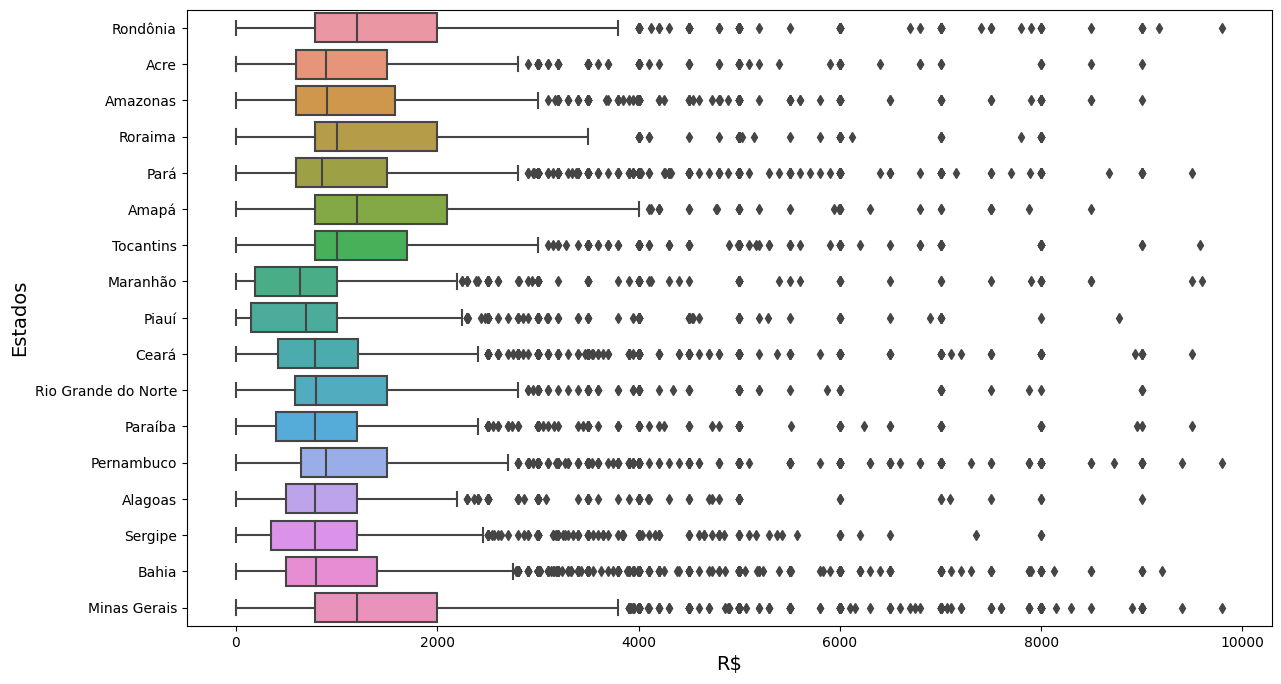

In [69]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('Renda < 10000'))
ax.figure.set_size_inches (14, 8)
ax.set_ylabel('Estados', fontsize = 14)
ax.set_xlabel('R$', fontsize = 14)
ax

> ### Conclusões

Escreva suas conclusões aqui...